# Homework 4: The Bootstrap

## Introduction

In this homework, we will examine the bootstrap in greater detail. One focus is to solidify the two basic concepts behind the bootstrap:

1. Use the sample as the bootstrap population. We can find the sampling distribution of the statistic of interest, when the sampling from the bootstrap population.
1. Use the Monte Carlo method to approximate the sampling distribution of the bootstrap statistic.  That is, draw thousands of samples from the bootstrap population, calculate the
statistic for each bootstrap sample, and use the distribution of these bootstrap statistics to approximate the actual sampling distribution of the bootstrap statistic.

The second focus of this homework is on variants on the standard bootstrap that improve the bootstrap in cases where the sample is highly skewed or when the data are not from a simple random sample. 
 
This homework has the following tasks: 

* Develop a functional approach to bootstrapping any statistic for any sample
* Derive the exact bootstrap distribution of a statistic for a small sample
* Compare confidence intervals based on the *t*-distribution to those where the sample SD is replaced with bootstrapped SD. 
* Investigate the studentized bootstrap method, which is used when the sample has a skewed distribution 
* Explore how to bootstrap data that have been collected via a random sampling scheme other than the simple random sample.

In [1]:
# Run this cell to set up your notebook

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook

In [2]:
ok = Notebook('hw4.ok')
ok.auth(force=False) # Change False to True if you are getting errors authenticating

Assignment: Homework 4
OK, version v1.12.10

Successfully logged in as sungbin.andy.kang@berkeley.edu


## The Bootstrap Procedure

The plain-vanilla bootstrap is a very simple process: 
* Sample with replacement from the original sample (now the bootstrap population). These samples are called *bootstrap samples*. We typically take thousands of bootstrap samples (~10,000 is common).
* Calculate the statistic of interest for each bootstrap sample. This statistic is called the *bootstrap statistic*, and the empirical distribution of these bootstrap statistics is an approximation to the *sampling distribution* of the bootstrapped statistic.

Your task is to write a generic boostrap procedure. 

### Question 1

#### Question 1a

First, write your own sampling function. The function `simple_resample` samples with replacement from the integers 0 through *n-1* and returns an array of length *n*
with the sampled integers. That is, `simple_resample` produces the indices for
a single bootstrap replicate from the bootstrap population.

Use the *numpy.random* function *randint* to do the random sampling. 


In [3]:
# given:  n, an integer
# return: an array of length n of a random sample with replacement of
#         the integers 0, 1, ..., n-1 
def simple_resample(n):
    return np.random.randint(n, size=n)

Try your `simple_resample` function on a few cases to see if the sampling looks right.

In [4]:
simple_resample(10)

array([3, 2, 2, 2, 9, 5, 1, 6, 0, 9])

In [5]:
_ = ok.grade('q01a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw4.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw4/backups/rkjm8p
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 1b

Next write the function `bootstrap` which returns an array of length `replicates`, each entry being the `statistic` of interest computed on a bootstrap `resample` of the `boot_pop` (bootstrap population).

In [42]:
# given:  boot_pop, an array of shape n x d,
#         statistic, a function which takes boot_pop and returns a number,
#         resample, a function which takes n and returns a random sample from the integers [0, n)
#         replicates, the number of resamples 
# return: an array of length replicates, each
#          entry being the statistic computed
#          on a bootstrap sample of the data.
def bootstrap(boot_pop, statistic, resample, replicates = 10000):
    boot_nums = np.array([resample(len(boot_pop)) for rep in np.arange(replicates)])
    for nums in boot_nums:
        for i in np.arange(len(boot_pop)):
            nums[i] = boot_pop[nums[i]]
    boot_statistic = np.array([statistic(nums) for nums in boot_nums])
    return boot_statistic


In [43]:
_ = ok.grade('q01b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw4.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw4/backups/mZ1Y5r
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## The Exact Bootstrap Sampling Distribution

Recall the two notions in the bootstrap procedure
1. Use the sample as the bootstrap population
1. Use the Monte Carlo method to approximate the sampling distribution of the bootstrap statistic

There are two approximations happening here. The first is the approximation of the true population by the bootstrap population (i.e., the sample). The second is the approximation of the sampling distribution of the statistic by simulation. It is the first approximation that is the main idea behind the bootsrap. 

In fact, when the dataset is small, we don't need the simulation. We can find the exact distribution of the bootstrap statistic.  

For example, the _tiny_ dataset in `cornea_diffs` below contains records of $n=7$ glaucoma patients with one affected eye (this data was collected in the 1970s by N. Ehlers). The array contains the difference in corneal thickness between affected and unaffected eyes. The sample mean is approximately $5.14$ microns.


In [8]:
cornea_diffs = np.array([-4, 0, 12, 18, -12, 6, 16]) 
sample_mean  = np.mean(cornea_diffs)

### Question 2

The typical bootstrap would have us randomly sample with replacement from `cornea_diffs` and calculate the mean many times. We then use the simulated bootstrapped distribution of the sample mean to assess accuracy of the estimate for the population mean, e.g., by constructing a confidence interval. 

However, since this dataset is so small, we can instead enumerate all possible samples from the bootstrap population--all $7^7$ possible ways of sampling with replacement.

#### Question 2a

Create a numpy array called `exact_bootstrap` of length $7^7$ containing the means of all possible bootstrap samples. 

You may find the function `itertools.product` useful.

In [9]:
import itertools

exact_bootstrap = itertools.product(cornea_diffs, repeat=7)
exact_bootstrap = np.array([np.mean(sample) for sample in exact_bootstrap])
exact_bootstrap

array([ -4.        ,  -3.42857143,  -1.71428571, ...,  12.        ,
        14.57142857,  16.        ])

In [10]:
_ = ok.grade('q02a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw4.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw4/backups/mZ1YO9
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 2b

Let's compare the exact bootstrap distribution of the sample mean to a simulated distribution.

Use your `bootstrap` function to perform the traditional bootstrap with $10000$ replicates.

Make two histograms to compare the exact and simulated distributions. To do this,
create a figure with two subplots. On the first subplot, show the histogram of the means calculated in part 2a. On the second subplot, show a histogram of $10000$ simulated bootstrapped means. On both subplots, include a vertical line denoting the sample mean.

(array([   13.,   122.,   394.,  1069.,  2034.,  2561.,  1947.,  1405.,
          399.,    56.]),
 array([ -9.14285714,  -6.57142857,  -4.        ,  -1.42857143,
          1.14285714,   3.71428571,   6.28571429,   8.85714286,
         11.42857143,  14.        ,  16.57142857]),
 <a list of 10 Patch objects>)

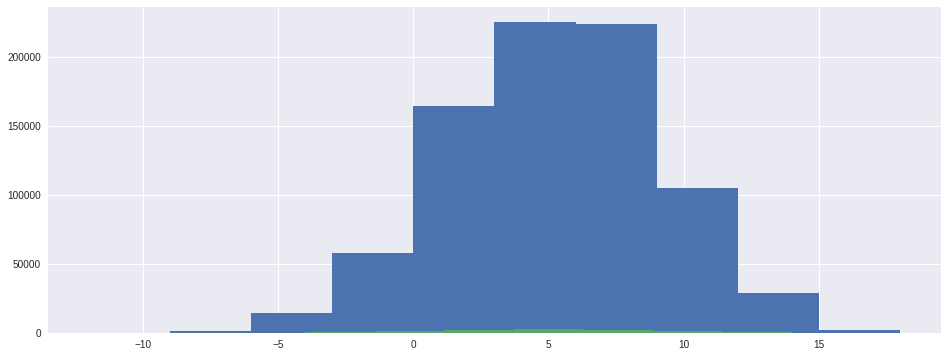

In [11]:
typical_bootstrap = bootstrap(cornea_diffs, np.mean, simple_resample)

# create figure here!
plt.figure(figsize=(16,6))
plt.hist(exact_bootstrap)
plt.hist(typical_bootstrap)

In [12]:
len(typical_bootstrap)

10000

Often a better way to compare distributions is with a quantile-quantile plot, where we plot the pairs of quantiles from the two distributions. Deviations from a line indicate differences in the two distributions.

Find the 499 evenly-spaced quantiles for each distribution: 0.002, 0.004, 0.006, ..., 0.998 quantiles. Make a scatter plot from the 499 pairs of these quantiles, e.g., (0.002 quantile of `exact_bootstrap`, 0.002 quantile of `typical_bootstrap`).

(array([   5.,   12.,   35.,   56.,  101.,  113.,   85.,   54.,   30.,    8.]),
 array([ -6.28571429,  -4.14285714,  -2.        ,   0.14285714,
          2.28571429,   4.42857143,   6.57142857,   8.71428571,
         10.85714286,  13.        ,  15.14285714]),
 <a list of 10 Patch objects>)

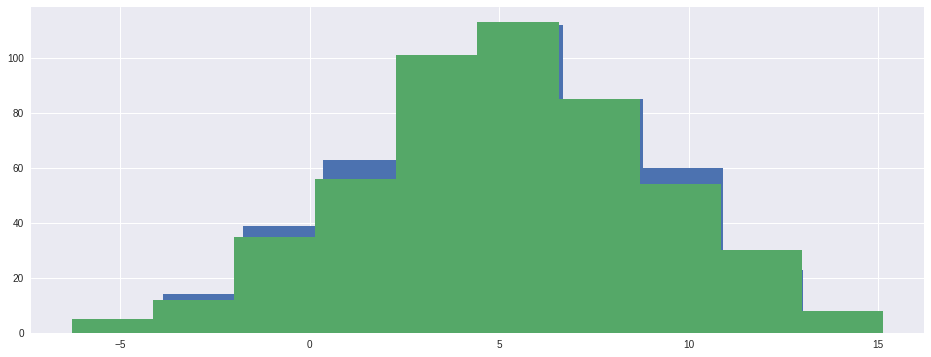

In [13]:
percents = np.arange(0.002, 1, 0.002)
quantile_exact = [np.percentile(exact_bootstrap, percent*100) for percent in percents]
quantile_sim = [np.percentile(typical_bootstrap, percent*100) for percent in percents]

plt.figure(figsize=(16,6))
plt.hist(quantile_exact)
plt.hist(quantile_sim)

Notice that the points closely follow a line with slope 1 indicating that the two distribution are very close.  There is some unusual behavior in the scatterplot. There are many small steps along the "line".  These are from the discreteness of the two distributions. When one distribution has the same value for several contiguous percentiles and the other distribution does not, then these steps will form. We don't need to worry about these small deviations as long as we are using the simulated distribution at a scale where these differences are negligible. For example, consider constructing a confidence interval for the population mean from the bootstrap distribution.

#### Question 2c

Construct a $95\%$ bootstrapped confidence interval for the population mean using the exact bootstrap distribution found in part (a). That is, construct a length $2$-tuple called `conf_interval_exact` that contains the 2.5th and 97.5th percentile of the exact bootstrap distribution.

Also construct a $95\%$ bootstrapped confidence interval for the population mean using the typical bootstrap method, i.e., using `typical_bootstrap`.  

Compare their left endpoints.

In [14]:
conf_interval_exact = (np.percentile(exact_bootstrap, 2.5), np.percentile(exact_bootstrap, 97.5))

conf_interval_sim = (np.percentile(typical_bootstrap, 2.5), np.percentile(typical_bootstrap, 97.5))

In [15]:
conf_interval_exact[1] - conf_interval_sim[1]

0.0

In [16]:
_ = ok.grade('q02c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw4.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw4/backups/xkp2n3
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Confidence Intervals based on normal theory

The central limit theorem says that the sample mean has a distribution that roughly follows the normal distribution.  The central limit theorem holds when the sample size is large in absolute terms, but small relative to the population. 

### Question 3

If we assume that the sampling distribution of the sample average is normally distributed, then we can use this property to create a confidence interval. The sampling 
distribution of a statistic is often approximately normally distributed. 

For a standard normal, which is centered at 0 and has a spread of 1, we can find the percentiles with the `ppf` method of  `scipy.stats.norm`.   

#### Question 3a

Use `ppf` to find the 0.975 and 0.275 quantiles of the standard normal distribution.

In [17]:
from scipy.stats import norm

q975 = norm.ppf(0.975)
q025 = norm.ppf(0.25)

By symmetry, we know that the 2.5 percentile is the negative of the 97.5 percentile, ie., they are $-1.96$ and $1.96$.  This means that the area under the standard normal curve between $-1.96$ and $1.96$ is 95%. We can use this property to form a confidence interval for the population mean.

#### Normal Theory

If $\theta$ is the
population mean, and we estimate it with our sample mean, $\hat{\theta}$, then for a simple 
random sample we know that

$$
E(\hat{\theta}) = \theta
$$
and 
$$
SE(\hat{\theta}) = \frac{\sigma}{\sqrt{n}},
$$
where $\sigma$ is the population SD. 
The Central Limit Theorem also says that $\hat{\theta}$ has a normal distribution 
(if $n$ is large enough).

This means that when we standardize $\hat{\theta}$,
$$ \frac{\hat{\theta} - \theta} {SE({\hat{\theta}})},$$
then the standardized statistic has a standard normal distribution.

We know that for the standard normal,  
$$0.95 = {\cal P}\left(-1.96 \leq \frac{\hat{\theta} - \theta} {SE({\hat{\theta}})} \leq 1.96\right)$$
We can reararnge terms to find a confidence interval for $\theta$
\begin{eqnarray*}
0.95 &=& {\cal P}\left(-1.96 \leq \frac{\hat{\theta} - \theta} {SE({\hat{\theta}})} \leq 1.96\right) \\
 & = & {\cal P}\left(-1.96 SE({\hat{\theta}}) \leq {\hat{\theta} - \theta} \leq 1.96 SE({\hat{\theta}})\right) \\
 & = & {\cal P}\left(\hat{\theta} - 1.96SE({\hat{\theta}}) \leq {\theta} \leq \hat{\theta} + 1.96SE({\hat{\theta}})\right) 
\end{eqnarray*}

Thus the interval $(\hat{\theta} - 1.96SE({\hat{\theta}}),
\hat{\theta} + 1.96SE({\hat{\theta}}))$ is a 95%
confidence interval for $\theta$.

### The $t$ approximation

Often we don't know $\sigma$, and so we can't make the confidence interval.  However, we can  use the sample SD as an estimate for $\sigma$, i.e., $SE(\hat{\theta}) = \sigma/\sqrt{n} \approx SD(\texttt{sample})/\sqrt{n}$. When we make this substitution, the distribution of the standardized statistic is no longer normal. That is, the distribution of
$$ \frac{\hat{\theta} - \theta} {SD(\texttt{sample})/\sqrt{n}}$$
follows a $t$-distribution. 

The $t$-distribution is actually a family of distributions. it is parameterized by the "degrees of freedom", which in our case is $n-1$.  The $t$-distirbution is symmetric and unimodal and looks much like the normal distribution, except the that tails are somewhat fatter. As $n$ increases, the sample SD approaches $\sigma$, the population SD, and the tails of the $t$-distribution get less fat and converge to the normal tails.

With the $t$-distribution, the 95% confidence interval becomes:

$$\left(\hat{\theta} + t_{0.025, n-1} \frac{SD(\texttt{sample})}{\sqrt{n}}, ~~~\hat{\theta} + t_{0.975, n-1} \frac {SD(\texttt{sample})}{\sqrt{n}}\right)$$



When bootstrapping was computationally infeasible, we relied heavily on the Central Limit Theorem to form confidence intervals for the population. Of course, an important question is whether $n$ is large enough to justify the assumption that that the CLT holds and we can treat our sample statistic as normally distributed.

#### Question 3b

Find the 0.975 quantile of the $t$-distribution for various degrees of freedom. How close are they to the quantiles of the normal?

In [18]:
from scipy.stats import t

degrees_of_freedom = np.array([6, 12,  24, 32, 100, 200])

right_endpoint = [t.ppf(0.975, df) for df in degrees_of_freedom]

In [19]:
_ = ok.grade('q03b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw4.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw4/backups/ERY08Y
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 3c

Use the $t$-distribution to create a 95% confidence interval for the cornea difference from Question 2. Compare the lengths of these two confidence intervals.

To do this, follow the steps:
* Find the mean and SD of the sample
* Find the percentiles for the $t$ with $n-1$ degrees of freedom
* Construct the confidence interval using the formula above

In [20]:
cornea_diffs_mean = np.mean(cornea_diffs)
cornea_diffs_sd = np.std(cornea_diffs)

t_percentiles = (t.ppf(0.025, 6), t.ppf(0.975, 6))

conf_int_t = (cornea_diffs_mean + t_percentiles[0] * (cornea_diffs_sd / np.sqrt(7)), cornea_diffs_mean + t_percentiles[1] * (cornea_diffs_sd / np.sqrt(7)))
conf_int_t

(-4.3330706758315847, 14.61878496154587)

In [21]:
_ = ok.grade('q03c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw4.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw4/backups/KrgL1M
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Compare the confidence interval based on the bootstrap percentile method and the one based on the $t$-distribution.  

Do they have the same length? The same endpoints?

## The Studentized Bootstrap
 
One variation on the bootstrap confidence interval uses the approach of standardizing the
statistic in $t$ and normal based confidence intervals.  This variation finds the bootstrap sampling distribution of the standardized statistic, i.e., we subtract the population statistic from the sample statistic and
divide by the standard error of the sampling statistic. Then, we use the percentiles of this distribution to create the confidence interval.


As in the case of the normal theory for the sample mean, 
if $\theta$ is the population parameter, and we estimate $\theta$ with our sample
statistic $\hat{\theta}$, then we can create a confidence interval on the distribution of

$$ \frac{\hat{\theta} - \theta} {SE({\hat{\theta}})}$$

from the 2.5 and 97.5 percentile of the distribution of the standardized statistic.
If $q_{0.025}$ and $q_{0.975}$ are the percentiles of this standardized statistic, then

\begin{eqnarray*}
0.95 &=& {\cal P}\left(q_{0.025} \leq \frac{\hat{\theta} - \theta} {SE({\hat{\theta}})} \leq q_{0.975}\right) \\
 & = & {\cal P}\left(q_{0.025}SE({\hat{\theta}}) \leq {\hat{\theta} - \theta} \leq q_{0.975}SE({\hat{\theta}})\right) \\
 & = & {\cal P}\left(\hat{\theta} - q_{0.975}SE({\hat{\theta}}) \leq {\theta} \leq \hat{\theta} - q_{0.025}SE({\hat{\theta}})\right) 
\end{eqnarray*}

Thus the interval $(\hat{\theta} - q_{0.975}SE({\hat{\theta}}),
\hat{\theta} - q_{0.025}SE({\hat{\theta}}))$ is a 95%
confidence interval for $\theta$.

Note that we have not used any normal theory or central limit theorem here. We have simply created a confidence interval based on the sampling distribution of the studentized statistic.

We can use the bootstrap to estimate the sampling distribution of the
studentized statistic.  That is, for each bootstrap sample, we compute the
bootstrap statistic, $\hat{\theta}^*$,
and the bootstrap standard error of this statistic,
$SE^*(\hat{\theta}^*)$ and use these to
construct the studentized statistic,

$$ \frac{\hat{\theta}^* - {\hat{\theta}}} {SE({\hat{\theta}}^*)}$$

We estimate $q_{0.025}$ and $q_{0.975}$ from these bootstrap replicates. 
Depending on the form of $\hat{\theta}$, its standard error
can be approximated by a simple function of the sample, and
consequently, the standard error of the bootstrap statistic,
$\hat{\theta}^*$, can be approximated
by a simple function of the bootstrap sample. 

One example is the mean. Recall that the standard error of the sample mean
is $\sigma / {\sqrt{n}}$, where
$\sigma$ is the standard deviation of
the population, which we approximate by the standard deviation
of the sample. This implies that we can approximate the standard error
of the bootstrap sample mean with $SD^* /
{\sqrt{n}}$, where
$SD^*$ is the standard deviation of
the bootstrap sample. Other times, we don't have a simple format for
the standard error and we need an alternative method of
approximation. 

You will apply this approach to find a studentized bootstrap confidence interval with
data collected for estimating the typical repair times for a population of customers.

### Question 4 - Average Repair Time

The New York Public Utilities Commission monitors the response time
for repairing land-line phone service in the state.  These repair
times may differ over the year and according to the type of repair.
We have repair times for one class of repairs at one time period.  The
commission is interested in estimates of the average repair time.

#### Question 4a

Read in the data provided in `data/ilec.csv`.

In [22]:
# read the data from data/ilec.csv
repair = pd.read_csv("data/ilec.csv")
repair.head()

,time
0,17.50
1,2.40
2,0.00
3,0.65
4,22.23


#### Question 4b

Before making any estimates of average repair time, we examine the
data values.  Make a histogram of the logarithm of repair time. When taking logs, use base 10. When there are 0 values, we often add 1 before taking the log. 

(array([ 408.,  191.,  273.,  381.,   40.,  190.,  118.,   37.,   23.,    3.]),
 array([ 0.        ,  0.22846563,  0.45693126,  0.68539688,  0.91386251,
         1.14232814,  1.37079377,  1.5992594 ,  1.82772503,  2.05619065,
         2.28465628]),
 <a list of 10 Patch objects>)

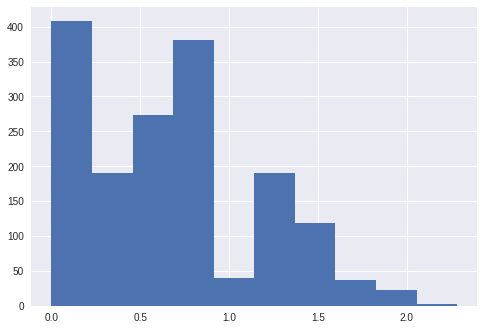

In [26]:
# plot a histogram of a log-transform of 1 + the repair time
plt.hist(np.log10(repair['time'] + 1))

We see that there is a spike at 0, which indicates that
many repairs happen immediately. We also see two modes (not counting the spike).
The second mode is centered at $\log(1 + 24)$, which indicates that many repairs occur then next day. Additionally, the distribution is skewed right with a long tail indicating that 
a few repairs take a long time.

#### Question 4c - Ordinary Bootstrap for the Sample Mean

Given that the sample size is well over 1500, we imagine that
the Central Limit Theorem (CLT) could well have taken
effect and the distribution of the normalized sample mean will be very
close to the normal.

Use your `bootstrap` function to estimate the bootstrap sampling distribution of the (upper trimmed) sample mean. Use 10,000 replicates.

In [39]:
np.mean(boot_means) - np.mean(repair['time'])

-0.39474777644232439

In [46]:
boot_means = bootstrap(np.log10(repair['time'] + 1), np.mean, simple_resample)

In [47]:
_ = ok.grade('q04c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q04c > Suite 1 > Case 1

>>> # also works with extremely high probability 
>>> max(boot_means) > np.mean(repair['time'])
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q04c --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw4.ipynb'.
Submit... 100% complete
Submission successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw4/submissions/v2n8WV
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Make a histogram of the bootstrapped upper trimmed means.

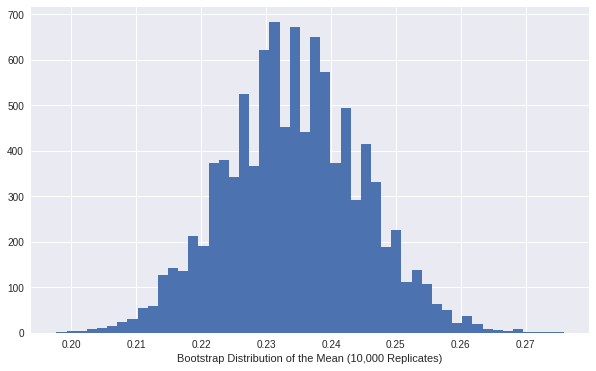

In [48]:
plt.figure(figsize=(10,6))
plt.hist(boot_means, bins = 50)
plt.xlabel("Bootstrap Distribution of the Mean (10,000 Replicates)")
plt.show()

#### Question 4d

Find the 95% bootstrapped confidence interval using the percentiles of `boot_up_means` from part d. Your answer should be a length $2$-tuple as in 2c.

In [49]:
conf_interval_endpoints = (np.mean(boot_means) - np.percentile(97.5, boot_means) * np.std(boot_means), np.mean(boot_means) - np.percentile(2.5, boot_means) * np.std(boot_means))

In [50]:
_ = ok.grade('q04d')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q04d > Suite 1 > Case 1

>>> isinstance(conf_interval_endpoints,tuple)
True
>>> len(conf_interval_endpoints) == 2
True
>>> conf_interval_endpoints[0] < conf_interval_endpoints[1]
array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

# Error: expected
#     True
# but got
#     array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

Run only this test case with "python3 ok -q q04d --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw4.ipynb'.
Submit... 100% complete
Submission successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw4/submissions/xkp2YJ
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4e

Estimate the bootstrap sampling distribution of the studentized sample mean. Use 10,000 replicates and store the results in `boot_stu_means`.

You will probably want to create a new function to compute the studentized statistic. To calculate the statistic:
* Take the mean of the bootstrap sample
* Center the mean by subtracting the mean of the original sample (bootstrap population)
* Scale the statistic by the SD of the bootstrap sample divided by the square-root of the length of the bootstrap sample 


In [ ]:
boot_stu_means = ...

In [ ]:
_ = ok.grade('q04e')
_ = ok.backup()

#### Question 4f

Make a histogram of the bootstrap replicates of the studentized statistic. It should have a center near 0.

In [ ]:
# create histogram plot here

#### Question 4g

Create a confidence interval for the orginal theta (the mean of the population) based on the bootstrap sampling distribution of the studentized statistic.


In [ ]:
conf_int_stu_endpoints  = ...

How does the studentized bootstrap compare to the ordinary bootstrap?
Compare the distance from the sample mean to the endpoints of confidence intervals.
Notice the skewness in the intervals; the sample mean is not in the center of the distribution.

In [ ]:
_ = ok.grade('q04g')
_ = ok.backup()

## Bootstrapping for Other Designs

One important perspective on the bootstrap comes from the *plug-in principle*. We would like to sample repeatedly from the population to assess the accuracy of some statistic, but we only have one sample. So instead, we treat the sample as our bootstrap population and resample from it as much as we care to. The core assumption is that our sample is representative of the population; similarly, our bootstrap resampling scheme should resemble the scheme we used to obtain our sample.

### Question 5 - Napa Valley Marathon Times

In this problem, we consider the results of the $1882$ runners in the Napa Valley Marathon. The data frame provided in `data/napa_sample.csv` is a stratified random sample of this population. Recall in stratified sampling, we divide our population into disjoint *strata*, and obtain a simple random sample from each stratum. Our sample consists of $4$ strata--the top $100$ female runners, the top $100$ male runners, the remaining $805$ female runners, and the remaining $877$ male runners (respectively). 

#### Question 5a

Read in the data provided in `data/napa_sample.csv`.

In [ ]:
napa = ...

#### Question 5b

Since the bootstrap function requires a numpy array, extract a numpy array of times from the `napa` dataframe.

In [ ]:
times = ...

#### Question 5c

Compare two sample averages, one that ignores the sampling procedure and the
other that takes the design into consideration:

* Calculate the average value of `times` and record the value in `sample_avg`.
* Next, calculate the mean race time within each stratum, and combine these in a weighted average, where the weights are according to the population strata sizes. That is, $100,100,805,$ and $877$ are the sizes for strata $1,2,3,$ and $4$, respectively. 

Compare the two methods of estimating the population mean.

In [ ]:
sample_avg = ...

pop_strata_prop = np.array([100,100,805,877]) / 1882
weighted_sample_avg = ...

In [ ]:
_ = ok.grade('q05c')
_ = ok.backup()

Compare these two sample averages. 
Which do you think is a good estimate of the population average?

The stratified sample, sampled the top 100 male and female runners at a 30% rate while the rest of the runners were sampled at about a 5% rate. This means that the fastest runners are over-represented in our sample. We must account for this sampling design in our analysis. 

#### Question 5d

We must also account for this sampling design in our bootstrapping. Compare the sampling
distribution when we ignore the design and when we take it into consideration.

* Create a variable called `b_simple` with $10000$ bootstrap replicates from the `times` data, with the mean computed on each replicate. This bootstrap procedure ignores how the sample was obtained.


* Next, create a variable called `b_strata` with $10000$ bootstrap replicates from the `times` data, with the statistic being the weighted mean as in 4c and the resampling procedure being sampling with replacement from each stratum. That is,
    * For each bootstrap replicate, take 4 simple random samples
    * Sample 30 times from strata 1, 30 from strata 2, etc.
    * Combine the sample from the 4 strata to create the bootstrap weighted average
    
Use your original `bootstrap` function for both bootstrapping procedures. In the stratified case, you will want to create a new sampling function and a new statistic for calculating the weighted average.


In [ ]:
strata = np.array(napa["stratum"])




b_simple = ...

b_strata = ...

In [ ]:
_ = ok.grade('q05d')
_ = ok.backup()

#### Question 5e

The average marathon time of the population was $4.3608$. Compare the bootstrap distributions for these two approaches by plotting their histograms along with the population mean. 

In [ ]:
# plot histogram here

Notice that the bootstrap that takes the sampling process into consideration yields a sampling distribution that is centered close to the population average and that has a smaller standard error.  A confidence interval based on the typical bootstrap procedure would miss the population average. Ignoring the design, can give very poor results.

## Submission

Run the cell below to run all the OkPy tests at once:

In [44]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q04c > Suite 1 > Case 1

>>> # also works with extremely high probability 
>>> max(boot_means) > np.mean(repair['time'])
True
>>> min(boot_means) < np.mean(repair['time'])
True
>>> abs(np.mean(boot_means) - np.mean(repair['time'])) < 0.1
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q04c --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

----------

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [45]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw4.ipynb'.
Submit... 100% complete
Submission successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw4/submissions/o23jq3
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit

